In [2]:
import numpy as np
import pandas as pd


#importing the datset and forming a dataframe
data = pd.read_csv('marketing_data.csv')
df = pd.DataFrame(data)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Quesiton 1: What are the age demographics of customers?

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Present Age'] = 2000 - df['Year_Birth'] + 21
avg_age = sum(list(df['Present Age']))/len(df['Present Age'])
print(avg_age)

52.19419642857143


<AxesSubplot:xlabel='Present Age', ylabel='count'>

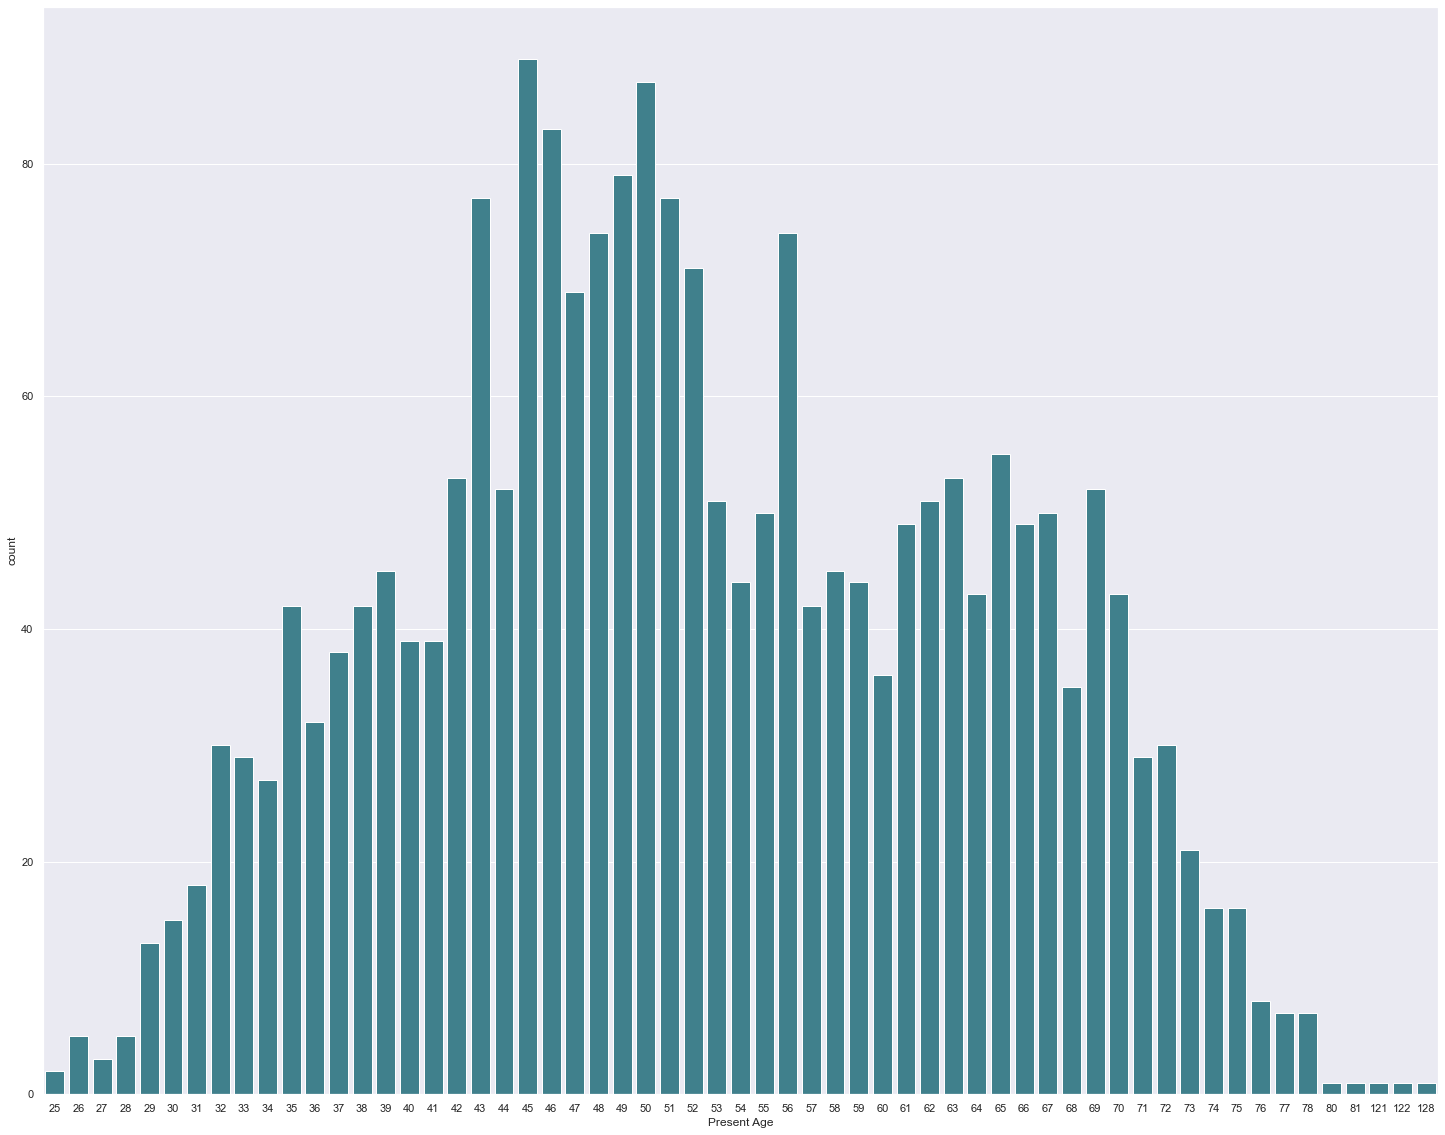

In [21]:
sns.set(rc={'figure.figsize':(25,20)})
sns.countplot(x = df['Present Age'],data = df,palette = ['#338999'])

## Question 2: What is the contribution of each individual compaigns in the total response.
the response to previous compaigns are stored in "AcceptedCmp1-5" and the most recently launched campaign is in "Response". "TotalPurchaseThroughCampaign" is created to visualize the contribution of individual campaigns.

<AxesSubplot:>

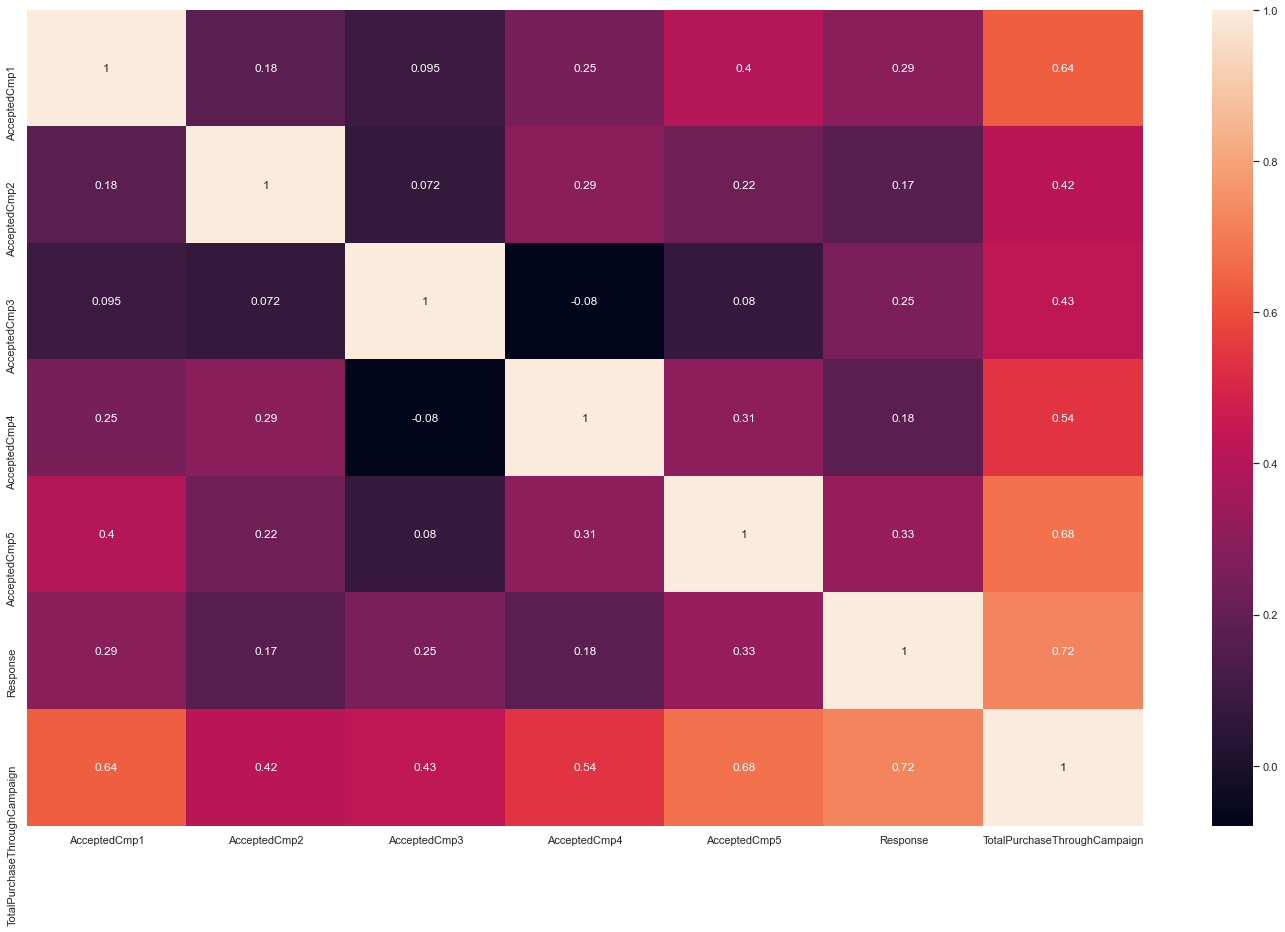

In [6]:
df['TotalPurchaseThroughCampaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4']  + df['AcceptedCmp5'] + df['Response']
df['TotalPurchaseThroughCampaign'].head()
sns.heatmap(data = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','TotalPurchaseThroughCampaign']].corr(),annot = True)


## Calculating percentage of purchases through each campaign

In [23]:
#calculating percentage of purchases through each campaign
count = 0
for i in df['AcceptedCmp1']:
  if i == 1:
    count = count+1
print((count/2240)*100)    

count = 0
for i in df['AcceptedCmp2']:
  if i == 1:
    count = count+1
print((count/2240)*100) 

count = 0
for i in df['AcceptedCmp3']:
  if i == 1:
    count = count+1
print((count/2240)*100) 

count = 0
for i in df['AcceptedCmp4']:
  if i == 1:
    count = count+1
print((count/2240)*100) 

count = 0
for i in df['AcceptedCmp5']:
  if i == 1:
    count = count+1
print((count/2240)*100) 

count = 0
for i in df['Response']:
  if i == 1:
    count = count+1
print((count/2240)*100) 

6.428571428571428
1.3392857142857142
7.276785714285714
7.455357142857142
7.276785714285714
14.910714285714285


## Question 3: What are the education demographics of customers? 

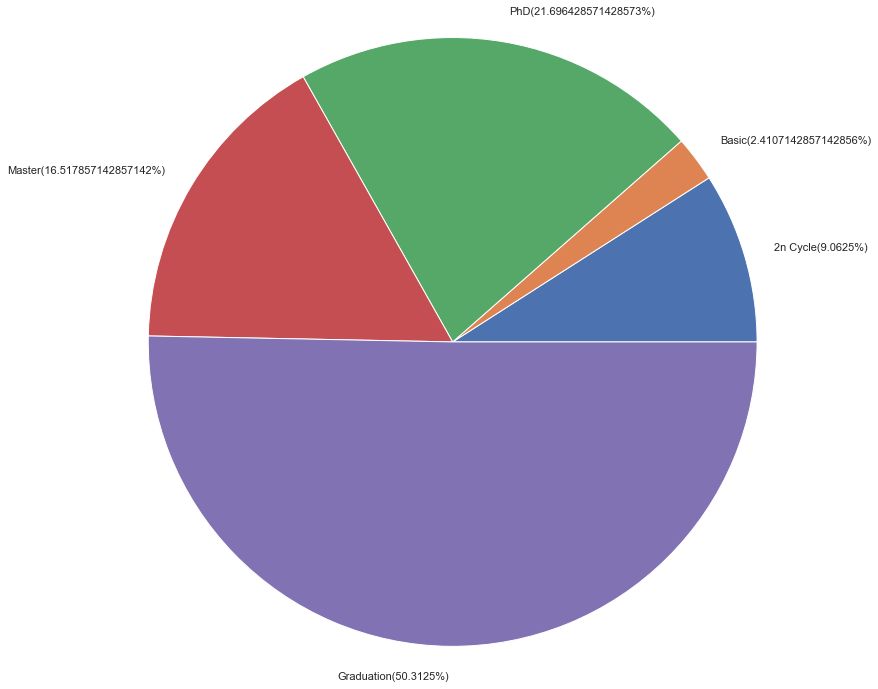

In [25]:
plt.figure(figsize=(10,7))
l,a = list(set(data["Education"])),[]
for i in range(len(l)):
    a.append(data["Education"].to_list().count(l[i]))
    l[i] = l[i]+"("+str(a[i]*100/len(data["Education"])) + "%)"
plt.pie(a,labels=l, radius=2)
plt.show()


## Question 4: What the relation between the education level and number of kids?

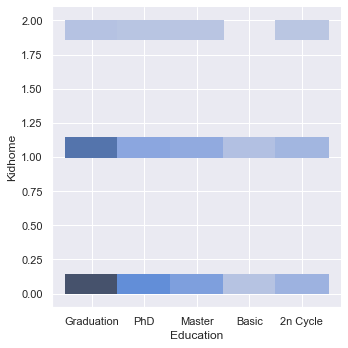

In [27]:
#relation between education and number of kids
sns.displot(x="Education",y="Kidhome",data=data)

## What's the relation between education level and response to the campaign?

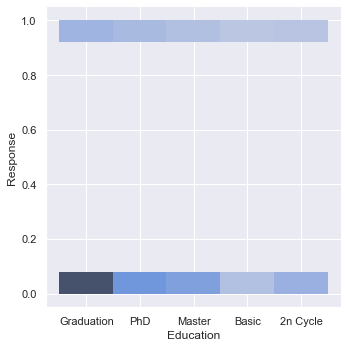

In [28]:
#relation between education and response to the campaign
sns.displot(x="Education",y="Response",data=data)

## What's the corrolation we can discover from the heatmaps?

<AxesSubplot:>

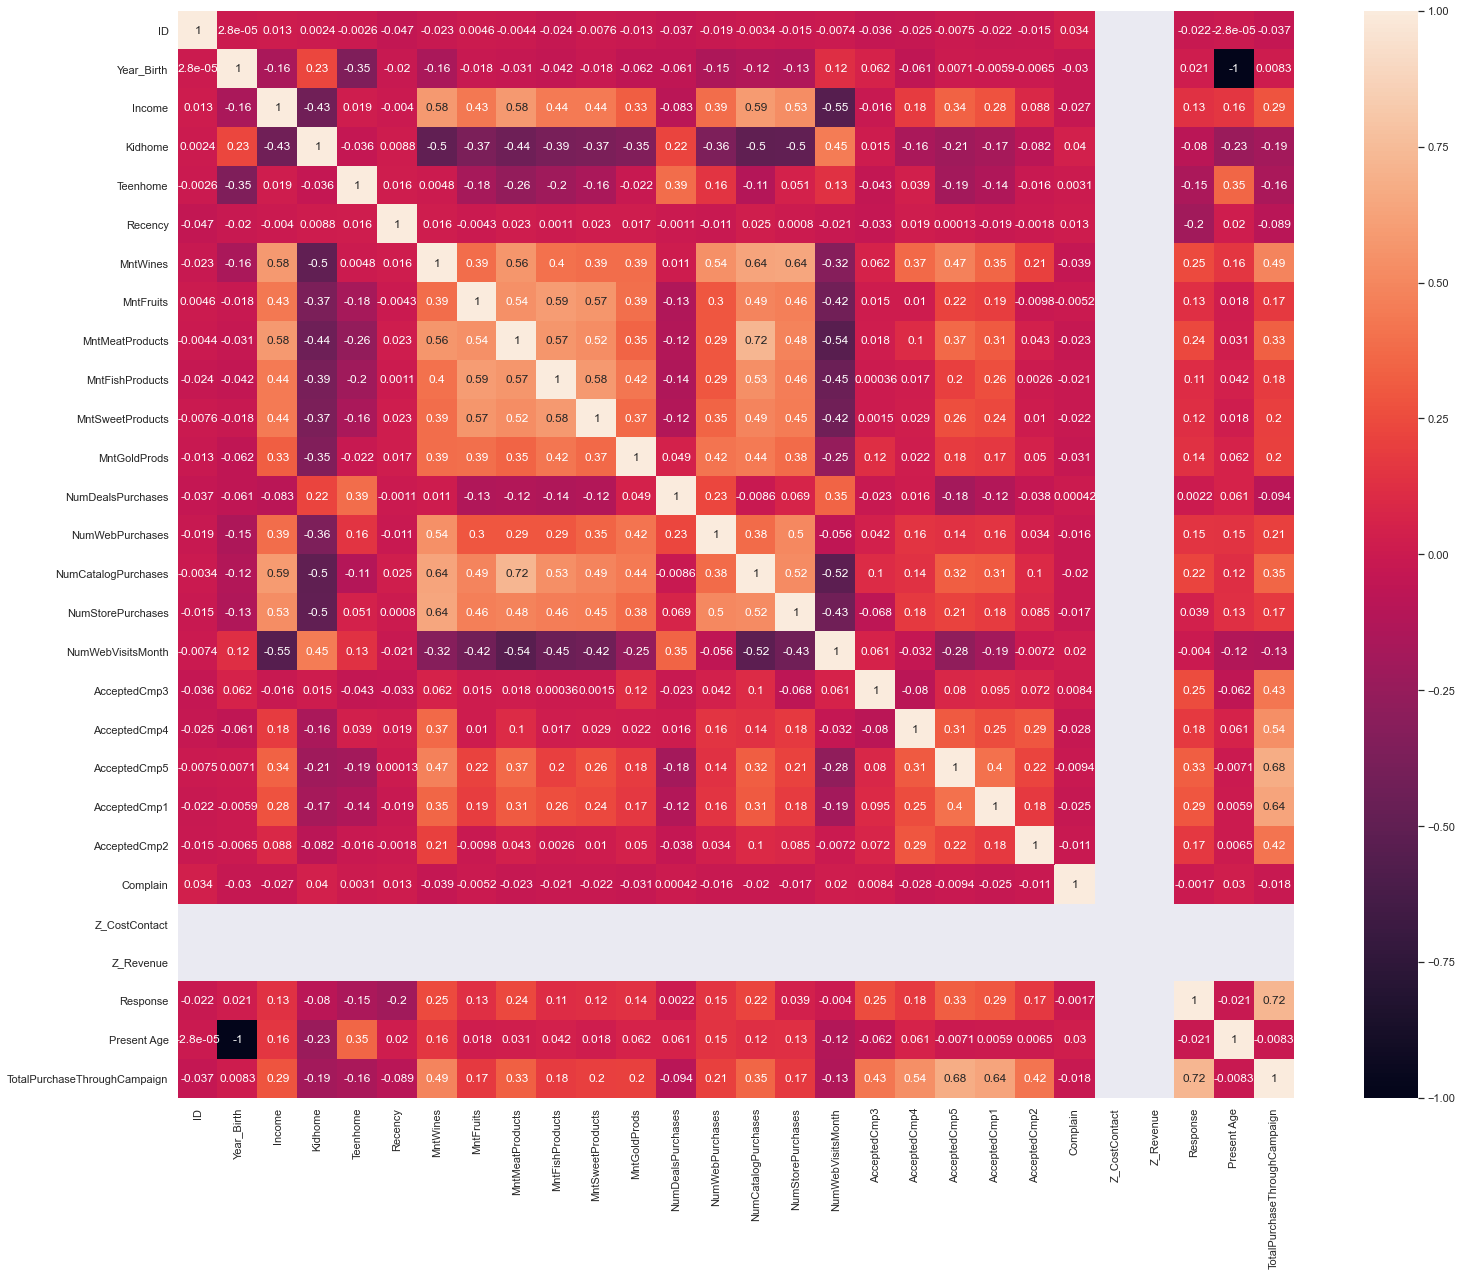

In [9]:
#heatmap
sns.set(rc={'figure.figsize':(25,20)})
sns.heatmap(data = df.corr(),annot=True)

We can see the pattern that edible itesm such as wine, fruit, meet an fish are often brought together and often brouhgt from the store.
And if a customer have a kid at home, he tend to order online to avoid taking kid out to shop for groceries.

<AxesSubplot:>

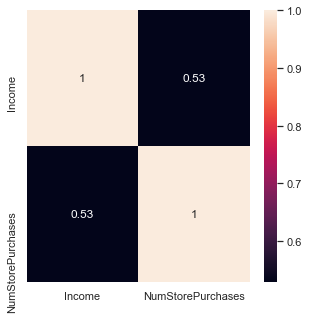

In [13]:
#relation between in store purchases and income
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df[['Income','NumStorePurchases']].corr(),annot=True)

We can see with the income increases, the customers prefer to by their products in store rather than from a website.